# 第３部
## 第６章：物流の最適ルートをコンサルティングする10本ノック

> ## 準備

In [1]:
# フォルダーに移動
% cd /content/drive/My Drive/Colab Notebooks/deeplab/data_analysis_100/

/content/drive/My Drive/Colab Notebooks/deeplab/data_analysis_100


In [2]:
% ls サンプルコード_20200325/6章

6章_物流の最適ルートをコンサルティングする１０本ノック_answer.ipynb
6章_物流の最適ルートをコンサルティングする１０本ノック.ipynb
demand.csv
network_pos.csv
network_weight.csv
rel_cost.csv
supply.csv
tbl_factory.csv
tbl_transaction.csv
tbl_warehouse.csv
trans_cost.csv
trans_route.csv
trans_route_new.csv
trans_route_pos.csv


In [3]:
# 日本語フォント用
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 2.8MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120193 sha256=467dd25d4cd182624d0cd42d14e5472e41d8ab9e8c8eeb013633e9e1572cd69f
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


In [4]:
# Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [5]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Config
PATH = './サンプルコード_20200325/6章/'

> ## ノック51:物流に関するデータを読み込んでみよう

In [7]:
# 生産工場用データ
df_tbl_factory = pd.read_csv(PATH+'tbl_factory.csv')
df_tbl_factory

,FCID,FCName,FCDemand,FCRegion
0,FC00001,東京工場,28,関東
1,FC00002,木更津工場,29,関東
2,FC00003,多摩工場,31,関東
3,FC00004,横須賀工場,25,関東
4,FC00005,仙台工場,21,東北
5,FC00006,山形工場,30,東北
6,FC00007,那須工場,25,東北
7,FC00008,青森工場,16,東北


In [8]:
# 倉庫のデータ
df_tbl_warehouse = pd.read_csv(PATH+'tbl_warehouse.csv')
df_tbl_warehouse

,WHID,WHName,WHSupply,WHRegion
0,WH00001,杉並倉庫,35,関東
1,WH00002,品川倉庫,41,関東
2,WH00003,豊洲倉庫,42,関東
3,WH00004,郡山倉庫,60,東北
4,WH00005,仙台倉庫,72,東北
5,WH00006,山形倉庫,65,東北


In [9]:
# 2019年の工場へ部品輸送実績
df_tbl_transaction = pd.read_csv(PATH+'tbl_transaction.csv')
df_tbl_transaction

,TRID,TransactionDate,ToFC,FromWH,Quantity
0,0,2019-01-01 02:11:10,FC00004,WH00003,33
1,1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2,2019-01-01 06:32:32,FC00006,WH00004,31
3,3,2019-01-01 07:17:06,FC00002,WH00003,18
4,4,2019-01-01 07:52:18,FC00001,WH00002,30
...,...,...,...,...,...
3995,3995,2019-12-31 11:27:51,FC00007,WH00006,29
3996,3996,2019-12-31 17:10:21,FC00002,WH00003,35
3997,3997,2019-12-31 19:35:07,FC00003,WH00001,36
3998,3998,2019-12-31 21:45:07,FC00005,WH00005,34


In [10]:
# 倉庫と工場間の輸送コスト
df_rel_cost = pd.read_csv(PATH+'rel_cost.csv')
df_rel_cost

,RCostID,FCID,WHID,Cost
0,1,FC00001,WH00001,0.4
1,2,FC00001,WH00002,0.8
2,3,FC00001,WH00003,1.5
3,4,FC00002,WH00001,0.9
4,5,FC00002,WH00002,0.8
5,6,FC00002,WH00003,1.6
6,7,FC00003,WH00001,1.2
7,8,FC00003,WH00002,1.3
8,9,FC00003,WH00003,1.5
9,10,FC00004,WH00001,0.8


In [11]:
df_demand = pd.read_csv(PATH+'demand.csv')
df_demand

,F1,F2,F3,F4
0,28,29,31,25


In [12]:
# グラフの座標
df_network_pos = pd.read_csv(PATH+'network_pos.csv')
df_network_pos

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


In [13]:
# グラフの重み
df_network_weight = pd.read_csv(PATH+'network_weight.csv')
df_network_weight

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


In [14]:
df_supply= pd.read_csv(PATH+'supply.csv')
df_supply

,W1,W2,W3
0,35,41,42


In [15]:
df_trans_cost = pd.read_csv(PATH+'trans_cost.csv')
df_trans_cost

,工場,F1,F2,F3,F4
0,W1,10,10,11,27
1,W2,18,21,12,14
2,W3,15,12,14,12


In [16]:
df_trans_route = pd.read_csv(PATH+'trans_route.csv')
df_trans_route

,工場,F1,F2,F3,F4
0,W1,15,15,0,5
1,W2,5,0,30,5
2,W3,10,15,2,15


In [17]:
df_trans_route_new = pd.read_csv(PATH+'trans_route_new.csv')
df_trans_route_new

,工場,F1,F2,F3,F4
0,W1,15,15,0,0
1,W2,5,0,30,10
2,W3,10,15,2,15


In [18]:
df_trans_route_pos = pd.read_csv(PATH+'trans_route_pos.csv')
df_trans_route_pos

,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


In [19]:
# 輸送実績, 輸送コスト, 工場データ, 倉庫データ の４つをマージ
df_joint = pd.merge(df_tbl_transaction, df_rel_cost, left_on=['ToFC', 'FromWH'], right_on=['FCID', 'WHID'], how='left')
df_joint = pd.merge(df_joint, df_tbl_factory, on='FCID', how='left')
df_joint = pd.merge(df_joint, df_tbl_warehouse, on='WHID', how='left')

In [20]:
df_joint = df_joint[['TRID', 'TransactionDate', 'Cost', 'Quantity', 'ToFC', 'FCName',  'FCRegion', 'FCDemand', 'WHID', 'WHName', 'WHRegion', 'WHSupply']]
df_joint.head()

,TRID,TransactionDate,Cost,Quantity,ToFC,FCName,FCRegion,FCDemand,WHID,WHName,WHRegion,WHSupply
0,0,2019-01-01 02:11:10,1.1,33,FC00004,横須賀工場,関東,25,WH00003,豊洲倉庫,関東,42
1,1,2019-01-01 06:12:42,1.3,19,FC00007,那須工場,東北,25,WH00006,山形倉庫,東北,65
2,2,2019-01-01 06:32:32,0.9,31,FC00006,山形工場,東北,30,WH00004,郡山倉庫,東北,60
3,3,2019-01-01 07:17:06,1.6,18,FC00002,木更津工場,関東,29,WH00003,豊洲倉庫,関東,42
4,4,2019-01-01 07:52:18,0.8,30,FC00001,東京工場,関東,28,WH00002,品川倉庫,関東,41


In [21]:
# 計測期間を確認
print(df_joint['TransactionDate'].min())
print(df_joint['TransactionDate'].max())

2019-01-01 02:11:10
2019-12-31 23:19:37


In [22]:
# 数値データの確認
df_joint.describe()

,TRID,Cost,Quantity,FCDemand,WHSupply
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,1.062825,24.840000,25.740500,52.521250
std,1154.844867,0.342615,8.717218,4.581311,13.810856
min,0.000000,0.300000,10.000000,16.000000,35.000000
25%,999.750000,0.800000,17.000000,25.000000,41.000000
50%,1999.500000,1.100000,25.000000,28.000000,51.000000
75%,2999.250000,1.300000,32.000000,30.000000,65.000000
max,3999.000000,1.600000,48.000000,31.000000,72.000000


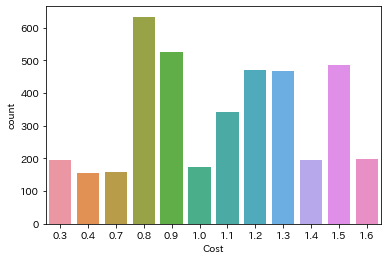

In [23]:
# コストの度数分布
sns.countplot(df_joint['Cost'])

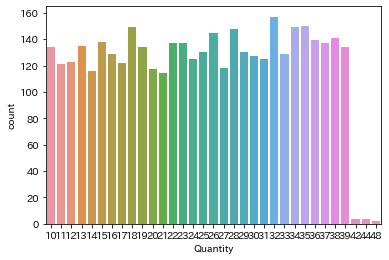

In [24]:
#数量の度数分布
sns.countplot(df_joint['Quantity'])

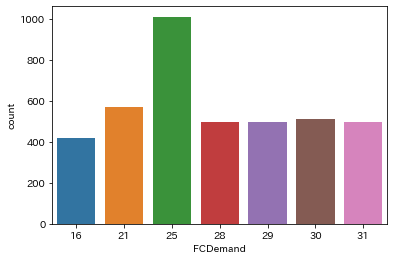

In [25]:
#工場需要量の度数分布
sns.countplot(df_joint['FCDemand'])

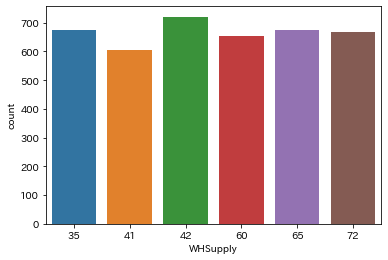

In [26]:
#倉庫供給量の度数分布
sns.countplot(df_joint['WHSupply'])

In [27]:
# 工場ごとのデータ数
df_joint.groupby('FCName')['TRID'].count()

FCName
仙台工場     570
多摩工場     497
山形工場     509
木更津工場    498
東京工場     498
横須賀工場    507
那須工場     502
青森工場     419
Name: TRID, dtype: int64

In [28]:
# 倉庫ごとのデータ数
df_joint.groupby('WHName')['TRID'].count()

WHName
仙台倉庫    669
品川倉庫    605
山形倉庫    676
杉並倉庫    674
豊洲倉庫    721
郡山倉庫    655
Name: TRID, dtype: int64

In [29]:
# 地域ごとの工場データ数
df_joint.groupby('FCRegion')['TRID'].count()

FCRegion
東北    2000
関東    2000
Name: TRID, dtype: int64

In [30]:
# 地域ごとの倉庫データ数
df_joint.groupby('WHRegion')['TRID'].count()

WHRegion
東北    2000
関東    2000
Name: TRID, dtype: int64

In [31]:
# 倉庫と工場の地域は全て一致しているよう
len(df_joint[df_joint['FCRegion']!=df_joint['WHRegion']])

0

> ## ノック52:現状の輸送量、コストを確認してみよう

In [32]:
# 各地域のトータル輸送量
df_joint.groupby('WHRegion')['Quantity'].sum()

WHRegion
東北    50214
関東    49146
Name: Quantity, dtype: int64

In [33]:
# 各地域のトータルコスト(万円)
df_joint.groupby('WHRegion')['Cost'].sum()

WHRegion
東北    2062.0
関東    2189.3
Name: Cost, dtype: float64

In [34]:
# 各地域の１輸送あたりのコスト(万円)
df_joint.groupby('WHRegion')['Cost'].mean()

WHRegion
東北    1.03100
関東    1.09465
Name: Cost, dtype: float64

In [35]:
# 各地域の輸送量あたりのコスト(円)
df_joint.groupby('WHRegion')['Cost'].sum()/df_joint.groupby('WHRegion')['Quantity'].sum()*10000

WHRegion
東北    410.642450
関東    445.468604
dtype: float64

- 輸送量あたりのコストは関東の方が大きい
- 平均コスト(１回輸送あたりのコスト)はほとんど変わらない

> ## ノック53:ネットワークを可視化してみよう

NetworkX でのネットワークの可視化は慣れてないので、基本教科書通りに進めます。
https://networkx.github.io/documentation/stable/tutorial.html

In [36]:
import networkx as nx

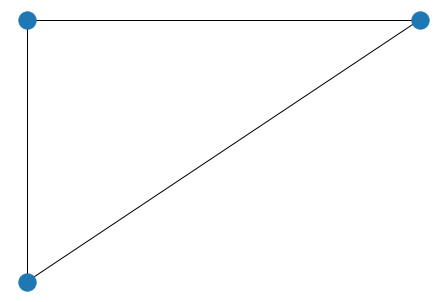

In [37]:
G = nx.Graph()

# 頂点の設定
G.add_node('nodeA')
G.add_node('nodeB')
G.add_node('nodeC')

# 辺の設定
G.add_edge('nodeA', 'nodeB')
G.add_edge('nodeA', 'nodeC')
G.add_edge('nodeC', 'nodeB')

# 座標の設定
pos = {}
pos['nodeA'] = (0,0)
pos['nodeB'] = (1,1)
pos['nodeC'] = (0,1)

# 描画
nx.draw(G, pos)

plt.show()

> ## ノック54:ネットワークにノード(頂点)を追加してみよう

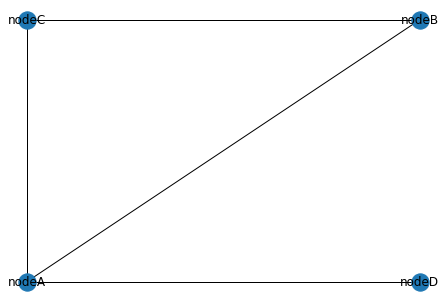

In [38]:
G.add_node('nodeD')
G.add_edge('nodeD', 'nodeA')
pos['nodeD'] = (1, 0)
nx.draw(G, pos, with_labels=True)
plt.show()

> ## ノック55:ルートの重みづけを実施しよう

In [39]:
df_network_pos

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


In [40]:
df_network_weight

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


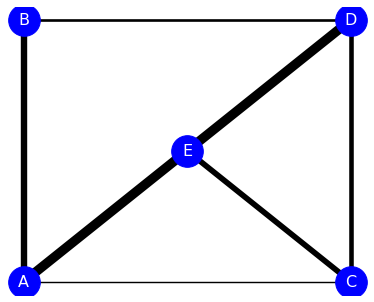

In [41]:
# 読み込んだデータからグラフを作成する
import itertools

# 重みをリスト化する
nodes = df_network_weight.columns
size = 10
list_edge_weights = []
for i in range(len(df_network_weight)):
  for j in range(len(nodes)):
    list_edge_weights.append(df_network_weight.iloc[i][j]*size)

# グラフオブジェクトを作成する
G = nx.Graph()

# 頂点の追加と座標の設定
pos = {}
for node in nodes:
    G.add_node(node)
    pos[node] = (df_network_pos[node][0], df_network_pos[node][1])

# 辺の設定
for node1, node2 in itertools.combinations(nodes, 2):
  G.add_edge(node1, node2)

# 描画
fig = plt.figure(figsize=(5, 4))
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='b', font_color='w', width=list_edge_weights)
plt.show()

> ## ノック56:輸送ルート情報を読み込んでみよう

In [42]:
df_trans_route.set_index('工場', drop=True, inplace=True)

In [43]:
# 工場と倉庫間の重み
df_trans_route

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [44]:
# 工場と倉庫の座標
df_trans_route_pos

,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


> ## ノック57:輸送ルート情報からネットワークを可視化してみよう

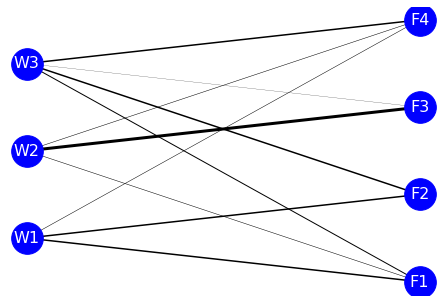

In [45]:
# 可視化してみる

nodes = df_trans_route_pos.columns
G = nx.Graph()
pos = {}

# 頂点と座標の設定
for node in nodes:
  G.add_node(node)
  pos[node] = (df_trans_route_pos[node][0], df_trans_route_pos[node][1])

# 辺と重みの設定
weights_list = []
for node_w in df_trans_route.index:
  for node_f in df_trans_route.columns:
    G.add_edge(node_w, node_f)
    weights_list.append(df_trans_route.loc[node_w][node_f]*0.1)

# 描写
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='b', font_color='w', width=weights_list)
plt.show()
    


> ## ノック58:輸送コスト関数を作成しよう


In [46]:
df_trans_route

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [47]:
df_trans_cost.set_index('工場', drop=True, inplace=True)
df_trans_cost

,F1,F2,F3,F4
工場,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


In [48]:
# 総輸送コストの計算
# コストx 重み

def calc_trans_cost(df_route, df_cost):
  total_cost = 0
  for node1 in df_route.index:
    for node2 in df_route.columns:
      total_cost += df_cost.loc[node1][node2]*df_route.loc[node1][node2]
  return total_cost


print('総輸送コスト: ', calc_trans_cost(df_trans_route, df_trans_cost))

総輸送コスト:  1493


> ## ノック59:制約条件を作ってみよう


ここも教科書通りに進めました。

In [49]:
# 需要側の制約条件
df_demand

,F1,F2,F3,F4
0,28,29,31,25


In [50]:
# 供給側の制約条件
df_supply

,W1,W2,W3
0,35,41,42


In [51]:
# 工場からの需要量
for i in range(len(df_demand.columns)):
  temp_sum = sum(df_trans_route[df_demand.columns[i]])
  print(str(df_demand.columns[i]) + 'への輸送量:', str(temp_sum)+ ' (需要量:', str(df_demand.iloc[0][i])+ ')')
  if temp_sum>=df_demand.iloc[0][i]:
    print('需要量を満たしてます。')
  else:
    print('需要量を満たしてません。輸送ルートを再計算してください。')

# 倉庫からの供給量
for i in range(len(df_supply.columns)):
  temp_sum = sum(df_trans_route.loc[df_supply.columns[i]])
  print(str(df_supply.columns[i])+'からの輸送量:', str(temp_sum)+' (供給量:', str(df_supply.iloc[0][i])+ ')')
  if temp_sum<=df_supply.iloc[0][i]:
    print('供給限界の範囲内です。')
  else:
    print('供給限界を超えています。輸送ルートを再計算してください。') 


F1への輸送量: 30 (需要量: 28)
需要量を満たしてます。
F2への輸送量: 30 (需要量: 29)
需要量を満たしてます。
F3への輸送量: 32 (需要量: 31)
需要量を満たしてます。
F4への輸送量: 25 (需要量: 25)
需要量を満たしてます。
W1からの輸送量: 35 (供給量: 35)
供給限界の範囲内です。
W2からの輸送量: 40 (供給量: 41)
供給限界の範囲内です。
W3からの輸送量: 42 (供給量: 42)
供給限界の範囲内です。


> ## ノック60:輸送ルートを変更して、輸送コスト関数の変化を確認しよう

In [52]:
# 新しいルート
df_trans_route_new.set_index('工場', drop=True, inplace=True)
df_trans_route_new

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,0
W2,5,0,30,10
W3,10,15,2,15


In [53]:
print('総輸送コスト: ', calc_trans_cost(df_trans_route_new, df_trans_cost))

総輸送コスト:  1428


In [54]:
# 工場からの需要量
def check_demand_condition(df_trans_route, df_demand):
  demand_flag = {}
  for i in range(len(df_demand.columns)):
    temp_sum = sum(df_trans_route[df_demand.columns[i]])
    if temp_sum>=df_demand.iloc[0][i]:
      demand_flag[df_demand.columns[i]] = 1
    else:
      demand_flag[df_demand.columns[i]] = 0
  print('需要条件計算結果： ', demand_flag)

# 倉庫からの供給量
def check_supply_condition(df_trans_route, df_supply):
  supply_flag = {}
  for i in range(len(df_supply.columns)):
    temp_sum = sum(df_trans_route.loc[df_supply.columns[i]])
    if temp_sum<=df_supply.iloc[0][i]:
      supply_flag[df_supply.columns[i]] = 1
    else:
      supply_flag[df_supply.columns[i]] = 0
  print('供給条件計算結果： ', supply_flag)
    

In [55]:
check_demand_condition(df_trans_route_new, df_demand)
check_supply_condition(df_trans_route_new, df_supply)

需要条件計算結果：  {'F1': 1, 'F2': 1, 'F3': 1, 'F4': 1}
供給条件計算結果：  {'W1': 1, 'W2': 0, 'W3': 1}
